# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [1]:
import sys
# Install packages correctly
# !{sys.executable} -m pip install numpy sklearn tensorflow keras
# # Fix mpl version due to subtle API differences
# !{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/tarun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [2]:
# Part 1: Spectral Clustering

def spectral_clustering(X,k):
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    W = nbrs.kneighbors_graph(X).toarray()
    for i in range(0,X.shape[0]):
        W[i][i] = 0
    L = csgraph.laplacian(W, normed=False)
    w,v = np.linalg.eig(L)
    e = v[:,0]
    Y_pred = list()
    for i in range(0,X.shape[0]):
        if(e[i] > 0):
            Y_pred.append(0)
        else:
            Y_pred.append(1)
    return np.array(Y_pred)

## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [3]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

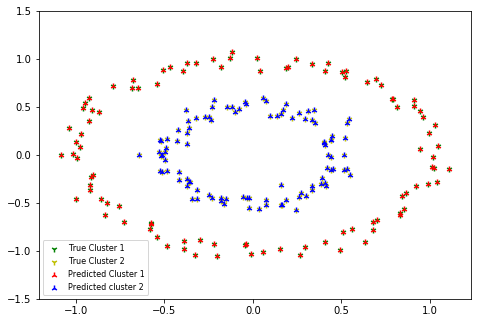

In [4]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
y_pred = spectral_clustering(CX,10)
c1_x = list()
c1_y = list()
c2_x = list()
c2_y = list()
t1_x = list()
t1_y = list()
t2_x = list()
t2_y = list()
for i in range(0,y_pred.shape[0]):
    x = CX[i][0]
    y = CX[i][1]
    if(y_pred[i] == 0):
        c1_x.append(x)
        c1_y.append(y)
    else:
        c2_x.append(x)
        c2_y.append(y)
    if(CY[i] == 0):
        t1_x.append(x)
        t1_y.append(y)
    else:
        t2_x.append(x)
        t2_y.append(y)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_ylim([-1.5,1.5])
t_i = ax.scatter(t1_x, t1_y,marker='1', color='g')
t_o = ax.scatter(t2_x, t2_y,marker='1', color='y')

p_i = ax.scatter(c1_x, c1_y, marker='2', color='r')
p_o = ax.scatter(c2_x, c2_y,marker='2', color='b')
plt.legend((t_i, t_o, p_i, p_o),
           ('True Cluster 1', 'True Cluster 2', 'Predicted Cluster 1', 'Predicted cluster 2'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=8)

plt.show()

### Please note that green and yellow points of true cluster labels are not visible because the points have exactly overlapped with each other. But once zoomed into the image, we can clearly see the other marker. 

# Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [5]:
# Part 3: Report the accuracy of clustering
score = 0
for i in range(0,CY.shape[0]):
    if(CY[i] == y_pred[i]):
        score += 1
print("Accuracy : ",(float(score)/float(CY.shape[0]))*100,"%")

Accuracy :  100.0 %


Here we have achieved 100% accuracy because the data points predicted overlap exactly on the actual data points.



---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [6]:
# Part 1: MDS

def MDS(X, k, output_dim=2):
    XXt = np.dot(X, X.T)
    w,v = np.linalg.eig(XXt)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    return v[:,:output_dim]

## Part 2: LLE
Implement Locally Linear Embedding function

In [7]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
    nbrs = NearestNeighbors(n_neighbors=(k+1)).fit(X)
    W = nbrs.kneighbors_graph(X).toarray()
    for i in range(X.shape[0]):
        W[i][i] = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if W[i][j] == 1:
                sq = 0
                for k in range(0,X.shape[1]):
                    sq += np.square(X[i][k]-X[j][k])
                W[i][j] = np.sqrt(sq)
    I = np.identity(W.shape[0])
    IW = I-W
    M = np.dot(IW,IW.T)
    w,v = np.linalg.eig(M)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    return v[:,:output_dim]
#     print(M)
  # Your code here
#   return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [8]:
# Part 3: Isomap
from sklearn.utils import graph_shortest_path

def ISOMAP(X, k, output_dim=2):
    nbrs = NearestNeighbors(n_neighbors=(k+1)).fit(X)
    W = nbrs.kneighbors_graph(X).toarray()
    for i in range(X.shape[0]):
        W[i][i] = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if W[i][j] == 1:
                sq = 0
                for k in range(0,X.shape[1]):
                    sq += np.square(X[i][k]-X[j][k])
                W[i][j] = np.sqrt(sq)
    Dg = graph_shortest_path.graph_shortest_path(W, True, 'FW')
    H = np.identity(X.shape[0]) - (np.ones((X.shape[0],X.shape[0]))/X.shape[0])
    K = np.dot(H, Dg)
    K = np.dot(K,H)
    K = K * -0.5
    w,v = np.linalg.eig(K)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    e = w[:output_dim]
    V = v[:,:output_dim]
    sigma = np.sqrt(e)
    Sigma = np.zeros((output_dim,output_dim))
    for i in range(output_dim):
        Sigma[i][i] = sigma[i]
    Y = np.dot(Sigma, V.T)
    return Y
#     print(H)

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [9]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

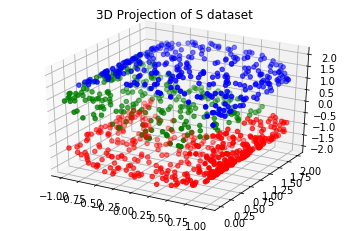

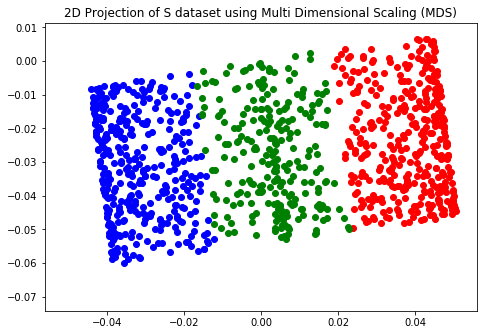

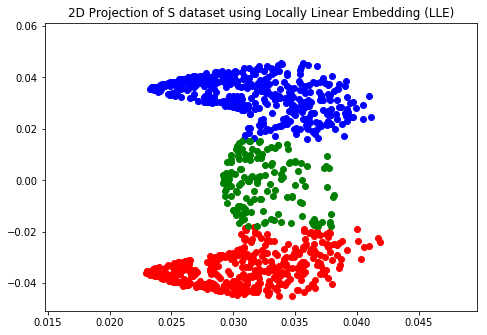

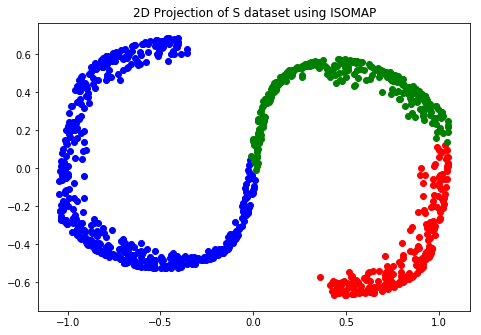

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def plot_graph(data, d, title):
    c1_x = list()
    c2_x = list()
    c3_x = list()
    c1_y = list()
    c2_y = list()
    c3_y = list()
    c1_z = list()
    c2_z = list()
    c3_z = list()

    kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
    labels = kmeans.labels_
    for i in range(0,labels.shape[0]):
        l = labels[i]
        if l == 0:
            c1_x.append(data[i][0])
            c1_y.append(data[i][1])
            if d == 3:
                c1_z.append(data[i][2])
        elif l == 1:
            c2_x.append(data[i][0])
            c2_y.append(data[i][1])
            if d == 3:
                c2_z.append(data[i][2])
        else:
            c3_x.append(data[i][0])
            c3_y.append(data[i][1])
            if d == 3:
                c3_z.append(data[i][2])
    fig = plt.figure()
    if d == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(title)
        ax.scatter(c1_x, c1_y, c1_z, color='b')
        ax.scatter(c2_x, c2_y, c2_z, color='r')
        ax.scatter(c3_x, c3_y, c3_z, color='g')
    else:
        ax=fig.add_axes([0,0,1,1])
        ax.set_title(title)
        ax.scatter(c1_x, c1_y, color='b')
        ax.scatter(c2_x, c2_y, color='r')
        ax.scatter(c3_x, c3_y, color='g')
    plt.show()

    
plot_graph(SX, 3, "3D Projection of S dataset")


### Multidimensional Scaling (MDS) plot

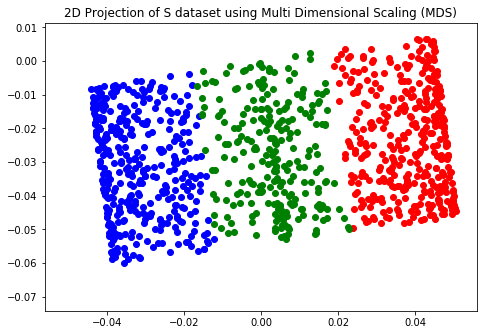

In [11]:
mds_Y = MDS(SX,10)

plot_graph(np.real(mds_Y), 2, "2D Projection of S dataset using Multi Dimensional Scaling (MDS)")

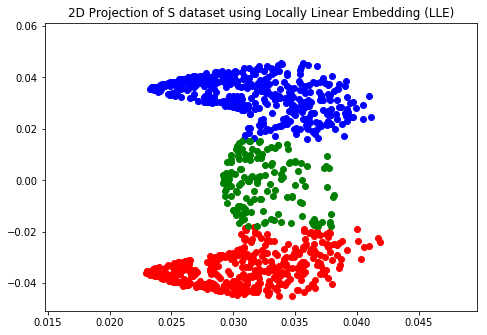

In [12]:
lle_Y = LLE(SX,400)

plot_graph(lle_Y, 2, "2D Projection of S dataset using Locally Linear Embedding (LLE)")


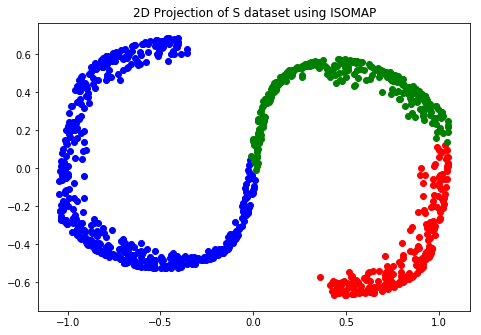

In [13]:
iso_Y = ISOMAP(SX,250)

plot_graph(np.real(iso_Y.T), 2,  "2D Projection of S dataset using ISOMAP")


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [ ]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

In [ ]:
x = swissroll[:,0]
y = swissroll[:,1]
z = swissroll[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Plot of the swiss roll dataset')
ax.scatter(x, y, z, color='r')
plt.show()
        
y_pred = spectral_clustering(swissroll,15)
c1_x = list()
c1_y = list()
c1_z = list()
c2_x = list()
c2_y = list()
c2_z = list()
for i in range(0,y_pred.shape[0]):
    x = swissroll[i][0]
    y = swissroll[i][1]
    z = swissroll[i][2]
    if(y_pred[i] == 0):
        c1_x.append(x)
        c1_y.append(y)
        c1_z.append(z)
    else:
        c2_x.append(x)
        c2_y.append(y)
        c2_z.append(z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Plot after performing Spectral Clustering on the swiss roll dataset')
ax.scatter(c1_x, c1_y, c1_z, color='r')
ax.scatter(c2_x, c2_y, c2_z, color='b')
plt.show()

def plot_graph(data, c, title):
    x = data[:,0]
    y = data[:,1]
    fig = plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.set_title(title)
    ax.scatter(x, y, color=c)
    plt.show()

    
mds_Y = MDS(swissroll,10)
plot_graph(np.real(mds_Y),'g', 'Unwrapped manifold after applying MDS algorithm on the dataset')

lle_Y = LLE(swissroll,1200)
plot_graph(lle_Y,'b', 'Unwrapped manifold after applying LLE algorithm on the dataset')

iso_Y = ISOMAP(swissroll,250)
iso_Y = iso_Y.T
plot_graph(iso_Y,'r', 'Unwrapped manifold after applying ISO algorithm on the dataset')



---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [ ]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

In [ ]:
from sklearn.decomposition import PCA
def reductionUsingPCA(X, k, output_dim, pca):
    if pca is None:
        pca = PCA(n_components=output_dim)
        pca.fit(X)
    X_pca = pca.transform(X)
    return pca, X_pca

In [ ]:
def reductionUsingISOMAP(X, k, output_dim, iso):
    if iso is None:
        iso = Isomap(n_components=output_dim)
        iso.fit(X)
    X_iso = iso.transform(X)
    return iso, X_iso

In [ ]:
# Classification Algorithm 
# Extra functions here
import pickle

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def prepareOneVsManyOutput(x_train, y_train):
    unique_classes = np.unique(y_train)
    class_to_weight = dict()
    class_to_output = dict()
    for c in unique_classes:
        class_to_weight[c] = np.random.rand(x_train.shape[1], 1)
        y = list()
        for i in range(0,y_train.shape[0]):
            if(y_train[i][0] == c):
                y.append(0)
            else:
                y.append(1)
        y = np.array(y)
        class_to_output[c] = np.reshape(y, (y.shape[0],1))
    return class_to_weight, class_to_output

def computeLoss(y, z):
    return -np.sum(((y*np.log(z)) + ((1-y)*np.log(1-z))))

def predict(X):
    y_pred = list()
    for i in range(0,X.shape[0]):
        curr_class = None
        confidence = None
        point = X[i]
        for j in range(0,10):
            filename = 'W_'+str(j)+'.pickle'
            W = pickle.load(open(filename,'rb'))
            h = np.dot(point,W)
            z = sigmoid(h)
            if z[0] <= 0.5:
                if curr_class is None:
                    curr_class = j
                    confidence = 1-z[0]
                elif 1-z[0] > confidence:
                    curr_class = j
                    confidence = 1-z[0]
        y_pred.append(curr_class)
    y_pred = np.array(y_pred)
    y_pred = np.reshape(y_pred,(y_pred.shape[0],1))
    return y_pred


def classification(X, y, n_classes):
    class_to_weight,class_to_output = prepareOneVsManyOutput(X, y)
    unique_classes = np.unique(y)
    alpha = 0.5
    for c in unique_classes:
        for e in range(1,10001):
#             W = class_to_weight[c]
            filename = 'W_'+str(c)+'.pickle'
            W = pickle.load(open(filename,'rb'))
            y_out = class_to_output[c]
            h = np.dot(X,W)
            z = sigmoid(h)
            dJdW = np.dot(X.T, z-y_out)
            W = W - (alpha * dJdW)
            class_to_weight[c] = W
            loss = computeLoss(y_out, z)
            if e%1000 == 0:
                print("Class ",c,"  loss after ",e," epochs: ",loss)
                print('Saving model...')
                filename = 'W_'+str(c)+'.pickle'
                pickle.dump(W, open(filename,'wb'))
                



In [ ]:
from sklearn.metrics import f1_score
def F1_score(y_true, y_pred):
    score = f1_score(y_true, y_pred, average='micro')
    return score

In [ ]:
# X_train = X_train/np.linalg.norm(X_train)
# X_test = X_test/np.linalg.norm(X_test)
# print("############################################")
# print()
# print("Principal Component Analysis (PCA) results with 100 components:")
# print()
# pca, X_train_pca = reductionUsingPCA(X_train, 2, 100, None)
# classification(X_train_pca, y_train, 10)
# y_pred_train = predict(X_train_pca)
# pca, X_test_pca = reductionUsingPCA(X_test, 2, 100, pca)
# y_pred_test = predict(X_test_pca)
# f1_score_train = F1_score(y_train, y_pred_train)
# f1_score_test = F1_score(y_test, y_pred_test)
# print("F1 score of training set: ",f1_score_train)
# print("F1 score of test set: ",f1_score_test)
# print()
# print("############################################")
# print()
# print("Principal Component Analysis (PCA) results with 200 components:")
# print()
# pca, X_train_pca = reductionUsingPCA(X_train, 2, 200, None)
# classification(X_train_pca, y_train, 10)
# y_pred_train = predict(X_train_pca)
# pca, X_test_pca = reductionUsingPCA(X_test, 2, 200, pca)
# y_pred_test = predict(X_test_pca)
# f1_score_train = F1_score(y_train, y_pred_train)
# f1_score_test = F1_score(y_test, y_pred_test)
# print("F1 score of training set: ",f1_score_train)
# print("F1 score of test set: ",f1_score_test)
# print()
# print("############################################")
# print()
# print("ISO results with 100 components:")
# print()
# iso, X_train_iso = reductionUsingISOMAP(X_train, 2, 100, None)
# classification(X_train_iso, y_train, 10)
# y_pred_train = predict(X_train_iso)
# pca, X_test_iso = reductionUsingISOMAP(X_test, 2, 100, iso)
# y_pred_test = predict(X_test_iso)
# f1_score_train = F1_score(y_train, y_pred_train)
# f1_score_test = F1_score(y_test, y_pred_test)
# print("F1 score of training set: ",f1_score_train)
# print("F1 score of test set: ",f1_score_test)
# print()
# print("############################################")
# print("ISO results with 200 components:")
# iso, X_train_iso = reductionUsingISOMAP(X_train, 2, 200, None)
# classification(X_train_iso, y_train, 10)
# y_pred_train = predict(X_train_iso)
# pca, X_test_iso = reductionUsingISOMAP(X_test, 2, 200, iso)
# y_pred_test = predict(X_test_iso)
# f1_score_train = F1_score(y_train, y_pred_train)
# f1_score_test = F1_score(y_test, y_pred_test)
# print("F1 score of training set: ",f1_score_train)
# print("F1 score of test set: ",f1_score_test)
# print("############################################")



print("############################################")
print()
print("Principal Component Analysis (PCA) results with 100 components:")
print()
y_train_pred = pickle.load(open('y_train_pred_pca_100.pickle','rb'))
y_test_pred = pickle.load(open('y_test_pred_pca_100.pickle','rb'))
f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_test_pred)
print("F1 score of training set: ",f1_score_train)
print("F1 score of test set: ",f1_score_test)
print()
print("############################################")
print()
print("Principal Component Analysis (PCA) results with 200 components:")
print()
y_train_pred = pickle.load(open('y_train_pred_pca.pickle','rb'))
y_test_pred = pickle.load(open('y_test_pred_pca.pickle','rb'))
f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_test_pred)
print("F1 score of training set: ",f1_score_train)
print("F1 score of test set: ",f1_score_test)
print()
print("############################################")
print()
print("ISO with 100 components:")
print()
y_train_pred = pickle.load(open('y_train_pred_iso_100.pickle','rb'))
y_test_pred = pickle.load(open('y_test_pred_iso_100.pickle','rb'))
f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_test_pred)
print("F1 score of training set: ",f1_score_train)
print("F1 score of test set: ",f1_score_test)
print()
print("############################################")
print()
print("ISO with 200 components:")
print()
y_train_pred = pickle.load(open('y_train_pred_iso.pickle','rb'))
y_test_pred = pickle.load(open('y_test_pred_iso.pickle','rb'))
f1_score_train = F1_score(y_train, y_train_pred)
f1_score_test = F1_score(y_test, y_test_pred)
print("F1 score of training set: ",f1_score_train)
print("F1 score of test set: ",f1_score_test)
print()
print("############################################")